## Imports

In [79]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

In [80]:
url = 'https://raw.githubusercontent.com/lnarisawa/co2emissions/main/owid-co2-data.csv'
df = pd.read_csv(url)
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### Solution

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [81]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

This simply defines a list with each of these non countries names.

Remove the rows corresponding to the non-countries.

In [82]:
df = df.loc[df['country'].isin(non_countries) == False]

this code redefines dataframe "df" to only include any data that does not correspond to one of the listed non-countries.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

In [83]:
df.head(4)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN


This simple command merely displays the head of our processed data frame.

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

Utilize the .info() command to find what variables are in each column, along with how many non null values there are.


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Many columns have null values (any whose non-null count is not 39638). All of them appear to be the correct data type.

##### $\rightarrow$ What years are present in the data set?

In [85]:
df['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

This code provides the start and end to the values in the dataframe in the column 'year'. Years 1850-2021 are covered

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



Our goal here is to determine within the data frame, specifically in rows labeled '2020' under the 'years' column, which have the highest value. We can do this by first defining that 'year' must equal 2020, then by sorting the vaalues in descending order (meaning the largest first). We then specify that we want the head, including the first ten. The values is optional for our purposes, but will determine how the output comes out.

In [87]:
df[df['year'] == 2020].sort_values(by = 'co2', ascending = False)['country'].head(10).values

array(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran',
       'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'],
      dtype=object)

The result of the code is an array of objects that fit our criteria. In order of ascending emissions, the top ten are South Korea, Indonesia, Germany, Saudi Arabia, Iran, Japan, Russia, India, United States, and China

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

Use seaborn to produce the histogram; see comments in code

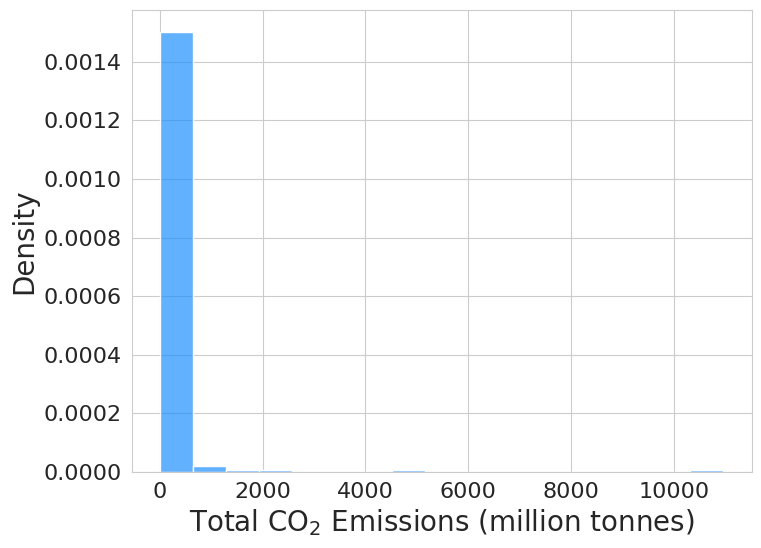

In [88]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes; units were obtained from the owid codebook
plt.ylabel('Density',fontsize = 20)
plt.xlabel('Total CO$_2$ Emissions (million tonnes)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The resulting distribution is heavily right skewed, implying that there is several outliers potentially impacting the division of the bins, partitioning almost all the results into one bin.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

Once again, use seaborn to generate both plots. they should automatically overlay.

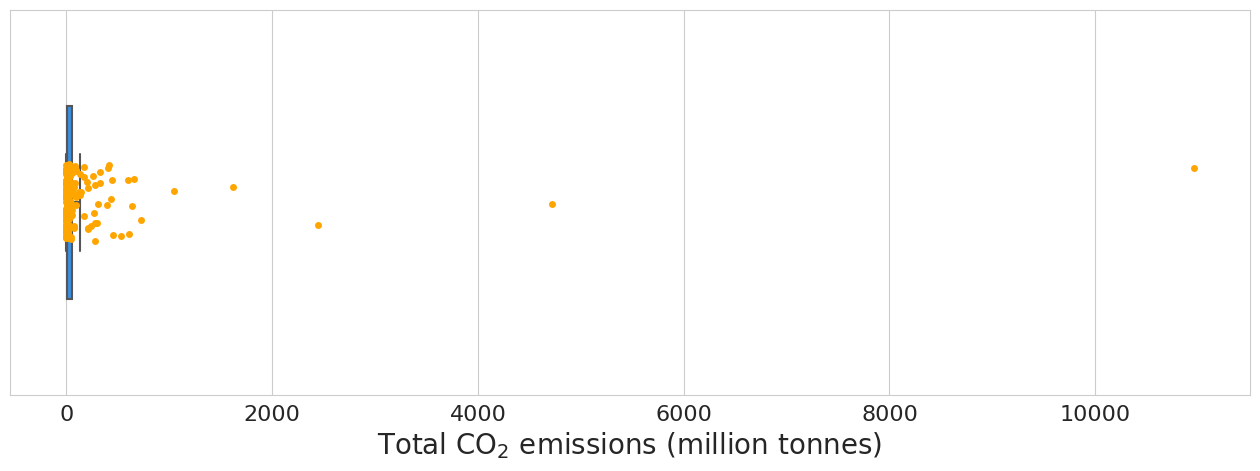

In [90]:
# Figure size
plt.figure(figsize = (16,5))

# Use Seaborn to make the boxplot. Removed outliers on boxplot so they are not double counted with the overlaaid stripplot
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, showfliers = False)
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange')

# Label axes
plt.xlabel('Total CO$_2$ emissions (million tonnes)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The strip plot overlaid with the box plot confirms that there are a number of large outliers in CO$_2$ production; the box plot itself is very difficult to see as a result

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

 Yes, the top ten are absolutely outliers

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

Similarly to determining which countries are top ten emitters, we now simply set a range of values for the column 'year', and sort values in descending order under 'co2', and for the top ten countries, we sum the amount of na values.

In [91]:
df[df['year'].between(1971,2020)].sort_values(by = 'co2', ascending = False)['country'].head(10).isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 8989    False
8988    False
8987    False
8986    False
8983    False
8982    False
8984    False
8981    False
8985    False
8980    False
Name: country, dtype: bool>

The result is boolean and the sum being false indicates that no trues were found within our range; thus no missing data is present for the top ten emitters for our time range.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

we can provide stipulations that our data from df must have values in our previously identified top ten countries, and use seaborn to plot this. We provide various arguments for the legend (hue), and provide the x and y axes data. The code is largely self explanatory.

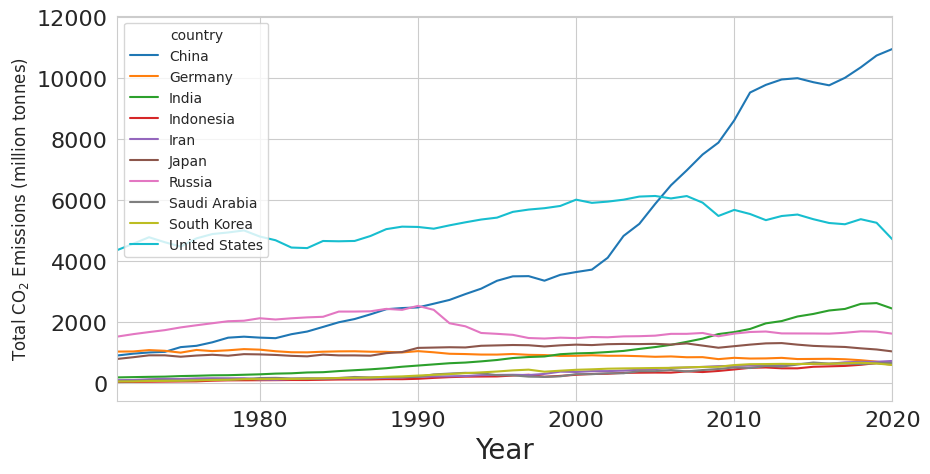

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran',
       'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x = 'year', y = 'co2', hue='country')
plt.xlim(1971,2020)


plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total CO$_2$ Emissions (million tonnes)', fontsize = 12)

plt.tick_params(labelsize = 16);

The resulting output sorts by the hue we provided (country). The time plot has many trendlines in a close range relative to one another when compared to the top two emitters of Chinaa and the United States.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

There are a few ways of approaching this. my solution was to insert a column into the same dataframe (I arbitrarily chose where, as it doesn't really matter), that takes the mean from all countries in emissions, grouped by year.

In [92]:
df.insert(10, "co2mean", df.groupby('year')['co2'].mean())

I then utilized a twin plot, with one y axis being the same as the previous time plot, and the other y axis being tuneable to the mean as the mean would be virtually invisible given the distribution of the data given in the histogram. I specified a color for the mean line, and a separate legend was also included. Code is detailed below

(1971.0, 2020.0)

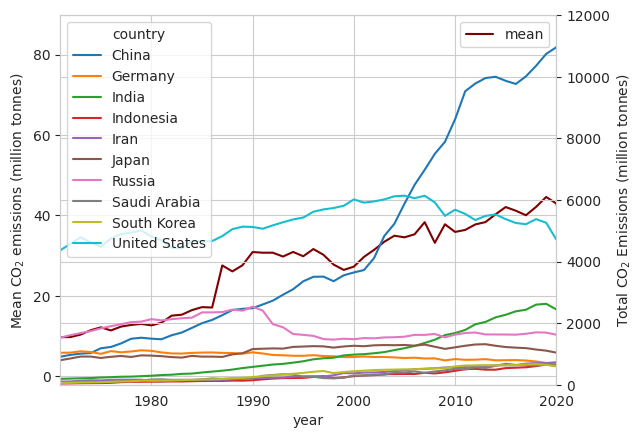

In [ ]:
# Utilized twin axes (ax and ax2) and a new column 'co2mean' in df to plot. Added legends for both plots, with the mean legend in the top right. Note the y-axes are not identical,  see comment below
fig, ax = plt.subplots()
ax2 = ax.twinx()

# Generated first lineplot with association to ax2. Set country arguments, axis labels, and aax2 limits
sns.lineplot(df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran',
       'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x = 'year', y = 'co2', hue='country', ax=ax2)
ax2.set_ylabel('Total CO$_2$ Emissions (million tonnes)')
ax2.set_ylim(0,12000)

# Generated first lineplot with association to ax2. Set country arguments, axis labels, and aax2 limits
sns.lineplot(df, x = 'year', y = 'co2mean', ax=ax, color = "maroon", errorbar=None, label = 'mean')
ax.set_ylabel('Mean CO$_2$ emissions (million tonnes)')

#Set the x bounds to match the prompt
plt.xlim(1971,2020)



NOTE: I intentionally chose to let the mean scaling be significantly lower to visualize the change; note that scaled comparably the increase in the mean is almost invisible. I understand this could be misinterpreted and purposefully misconstrued, but for the purpose of this visibility I have left it as is. We will note the output has two y axes as a result of the twin plot and two legends.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

The code here is identical to the above plot, simply adding that both y axes (ax and ax2) should be log

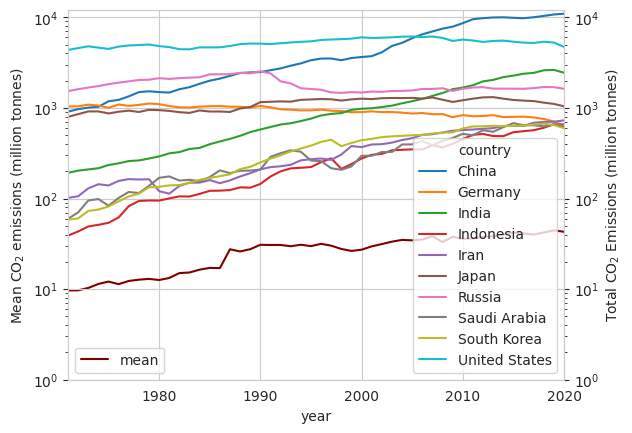

In [93]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran',
       'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x = 'year', y = 'co2', hue='country', ax=ax2)
ax2.set_ylabel('Total CO$_2$ Emissions (million tonnes)')
ax2.set_ylim(1,12000)

sns.lineplot(df, x = 'year', y = 'co2mean', ax=ax, color = "maroon", errorbar=None, label = 'mean')
ax.set_ylabel('Mean CO$_2$ emissions (million tonnes)')
plt.xlim(1971,2020)
ax.legend(loc = 'lower left')
ax.set_ylim(1,12000)
ax.set_yscale('log')
ax2.set_yscale('log')

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

The overall trend for the top emitters in 2020 displays that, for the most part, most countries have increaased their emissions between the period 1971-2020. There is a couple sidenotes; while the United States has still increased overall from 1971, its CO$_2$ production has decreased from the year 2000. It is also easy to point at China's meteoric rise and put the blame on GHG increases on them, but it must be noted that the data is total emissions, not per capita, and China is far and away the largest country in population. This data also looks at trends aand not total historical emissions; over the last 200 years, the sum of China's emissions still does not come close to the total emissions of the US and other European nations. It does not detraact however from the fact that China is currently the most significant CO$_2$ producer. In addition, despite their lower populations, countries like Germany produce a lot of CO$_2$; in terms of policy, these countries with huge per capita CO$_2$ productions should also raise eyebrows. All this is to say that total emissions by country are a small part of looking at climate change and must be interpreted carefully as to not promote hateful ideologies and to identify the best paths forward as a unified collective.